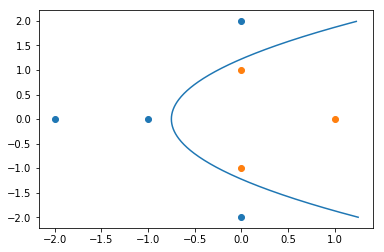

[-2  4  4  6 10 10 10] [-2 -5 -1 -2 -7  1  1]


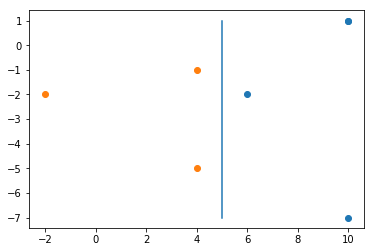

In [4]:
#第一題
import numpy as np
import matplotlib.pyplot  as  plt 
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1,-1,-1,1,1,1,1])

x1 = x[y>0][:,0]
y1 = x[y>0][:,1]
x2 = x[y<0][:,0]
y2 = x[y<0][:,1]
plt.scatter(x1,y1)
plt.scatter(x2,y2)

y3 = np.arange(-2,2,0.01)
x3 = np.array((2*(y3**2)-3)/4)
plt.plot(x3,y3)
plt.show()

def transformed_to_z(x1,x2):
    z1 = 2*(x2**2) - 4*x1 + 2
    z2 = x1**2 - 2*x2 - 3
    
    return(z1,z2)

z1,z2 = transformed_to_z(x[:][:,0],x[:][:,1])
print(z1,z2)
x1 = z1[y>0]
y1 = z2[y>0]
x2 = z1[y<0]
y2 = z2[y<0]

plt.scatter(x1,y1)
plt.scatter(x2,y2)
y = np.arange(-7,1,0.01)
x = np.ones(len(y))*5

plt.plot(x,y)
plt.show()

In [5]:
#第2題
from sklearn import svm

x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1,-1,-1,1,1,1,1])

clf = svm.SVC(kernel='poly',degree=2,coef0=1,gamma=1,C=1e10)
clf.fit(x,y)
print(clf.support_vectors_,clf.support_)
print(y[clf.support_]*clf.dual_coef_[0])

[[ 0.  1.]
 [ 0. -1.]
 [-1.  0.]
 [ 0.  2.]
 [ 0. -2.]] [1 2 3 4 5]
[0.59647182 0.81065085 0.8887034  0.20566488 0.31275439]


In [6]:
#第3題
def g(x):
    r =np.sqrt(2)
    return np.array([1,r*x[0],r*x[1],x[0]**2,x[0]*x[1],x[1]*x[0],x[1]**2])
support = clf.support_
coef = clf.dual_coef_[0]
x4 = np.array([g(i) for i in x])

s = support[2]
b = y[s] - coef.dot(x4[support].dot(x4[s]))
b

-1.6661102048266958

In [ ]:
#第13題
import numpy as np
from sklearn import svm
import matplotlib.pyplot  as  plt 

train = np.loadtxt('features.train.txt')
test = np.loadtxt('features.test.txt')
train_X = np.array(train[:,1:3])
# ''2'' versus 'not 2' plot |w| versus  logC{-5,-3,-1,1,3}
train_Y = np.array((train[:,0]==2))

c = [-5,-3,-1,1,3]
W = []

for i in c:
    print('C=',i)
    clf = svm.SVC(kernel = "linear",C = 10**i)
    clf.fit(train_X,train_Y)
    w = clf.coef_[0]
    W.append(np.sqrt(np.sum(w*w)))
    print('ok')
    
plt.scatter(c,W)
plt.xlabel('logC')
plt.ylabel('|W|')
plt.savefig("problem13.png")
plt.show()

C= -5
ok
C= -3
ok
C= -1
ok
C= 1
ok
C= 3


c= -5
Ok
[False False False ... False False False]


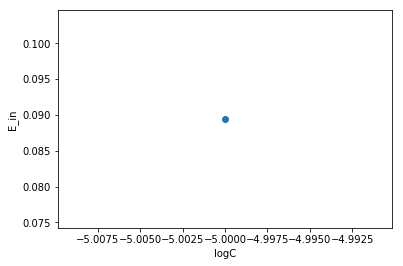

In [40]:
#第14題
import numpy as np
from sklearn import svm
import matplotlib.pyplot  as  plt 

train = np.loadtxt('features.train.txt')
test = np.loadtxt('features.test.txt')
train_X = train[:,1:3]
train_Y = []
# ''4'' versus 'not 4' logC{-5,-3,-1,1,3}
train_Y = np.array((train[:,0]==4))
        
c = [-5,-3,-1,1,3]
E_in = []

for i in c:
    clf = svm.SVC(kernel = "poly",C = 10**i,degree=2,coef0 = 1,gamma=1)
    print("c=",i)
    clf.fit(train_X,train_Y)
    print('Ok')
    error = np.sum(clf.predict(train_X) !=train_Y)/len(train_X)
    E_in.append(error)
    
plt.scatter(c,E_in)
plt.xlabel('logC')
plt.ylabel('E_in')
plt.savefig("problem14_E_in.png")
plt.show()

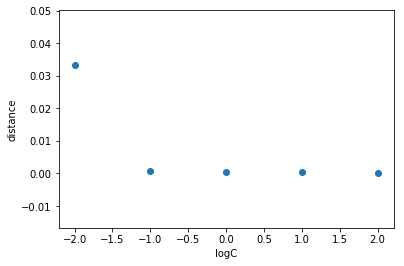

In [13]:
#第15題
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt 

train = np.loadtxt('features.train.txt')
test = np.loadtxt('features.test.txt')
train_X = train[:,1:3]
train_Y = []
# ''0'' versus 'not 0' logC{-2,-1,0,1,2}
train_Y = np.array((train[:,0]==0))

c = [-2,-1,0,1,2]
distance = []

for i in c:
    clf = svm.SVC(kernel = 'rbf',gamma = 80,C = 10**i)
    clf.fit(train_X,train_Y)
    w = clf.dual_coef_[0].dot(clf.support_vectors_)
    dis = 1/np.sum(w*w)
    distance.append(dis)

plt.scatter(c,distance)
plt.xlabel('logC')
plt.ylabel('distance')
plt.savefig("problem15_distance.png")
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[ 0.  0.  1. 35. 64.]


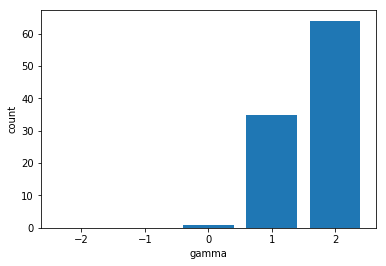

In [12]:
#第16題
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt 

def shuffle(X,Y,seed):
    #依造種子隨機打亂資料順序
    randomize = np.arange(len(X))
    np.random.seed(seed)
    np.random.shuffle(randomize)
    return (X[randomize], Y[randomize])


train = np.loadtxt('features.train.txt')
test = np.loadtxt('features.test.txt')
train_X = train[:,1:3]
train_Y = []

# ''0'' versus 'not 0' C=0.1 log(gamma)={-2,-1,0,1,2}
train_Y = np.array((train[:,0]==0))
test_Y = np.array((test[:,0]==0))

c = 0.1
count = np.zeros(5)
gamma = [-2,-1,0,1,2]

for n in range(100):
    print(n)
    train_x,train_y = shuffle(train_X,train_Y,n+100)
    val_x,val_y=train_x[0:1000],train_y[0:1000]
    x,y = train_x[1000:-1],train_y[1000:-1]
    E_val = []
    
    for i in gamma:
        clf = svm.SVC(kernel='rbf',gamma=10**i,C = c)
        clf.fit(train_X,train_Y)
        e = np.sum(clf.predict(val_x) != val_y)/len(val_x)
        E_val.append(e)
    count[np.argmin(E_val)] += 1

print(count)
plt.bar(gamma,count)
plt.xlabel('gamma')
plt.ylabel('count')
plt.savefig("problem16")
plt.show()